In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

#pybrain net
import pybrain
from pybrain.datasets import UnsupervisedDataSet, SupervisedDataSet
from pybrain.tools.shortcuts import buildNetwork
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.tools.validation import Validator

#scikit-learn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

#datasets
import train_datasets as tr_dat

In [2]:
def mlp_trainer(X_train,y_train,in_vec=20,out_vec=3, train_length=1500):
    # X_train = array de entrenamiento: valores de entrada
    # y_train = array de entrenamiento: valores de salida
    # in_vec = longitud vector valores de entrada
    # out_vec = longitud vector valores de salida
    # train_length = Cantidad de ensayos de entrenamiento
    Dtrain = SupervisedDataSet(in_vec,out_vec) # define a dataset in pybrain
    [Dtrain.addSample(X_train[i],y_train[i]) for i in xrange(len(X_train))]
    validator =  Validator()
    net = buildNetwork(in_vec,4,out_vec, hiddenclass=pybrain.SigmoidLayer, outclass=pybrain.SigmoidLayer)
    T = BackpropTrainer(net, learningrate=0.01, momentum=0.99)
    scores = []
    for i in xrange(train_length):
        T.trainOnDataset(Dtrain, 1)
        prediction = net.activateOnDataset(Dtrain)
        scores.append(validator.MSE(prediction, Dtrain.getField('target')))
    plt.ylabel('Mean Square Error')
    plt.xlabel('Iteration')
    plt.plot(scores)
    print("**** Respuestas de entrenamiento")
    print(pd.DataFrame([[net.activate(X_train[i]),y_train[i]] for i in xrange(len(X_train))]))
    print ("Error ensayo final", scores[train_length-1])
    return net
    

# Reflexivity
## Trainning

In [3]:
reflexiv_A_A=tr_dat.reflexiv

In [4]:
X_reflexiv_A_A=[dat[0] for dat in reflexiv_A_A]
y_reflexiv_A_A=[dat[1] for dat in reflexiv_A_A]

X_train_reflexiv_A_A, X_test_reflexiv_A_A, y_train_reflexiv_A_A, y_test_reflexiv_A_A = train_test_split(X_reflexiv_A_A,y_reflexiv_A_A, test_size=0.2)

**** Respuestas de entrenamiento
                                                     0          1
0    [0.0116949080778, 3.68106790631e-08, 0.0401990...  [0, 0, 0]
1    [3.91527589366e-13, 0.965422977909, 0.05672657...  [0, 1, 0]
2    [0.999999999999, 5.37253682328e-25, 0.04662974...  [1, 0, 0]
3    [3.61292434792e-07, 0.00547414581348, 0.065130...  [0, 0, 0]
4    [0.999999999902, 1.56320016601e-22, 0.04515664...  [1, 0, 0]
5    [4.52299209184e-05, 7.30876105981e-05, 0.04722...  [0, 0, 0]
6    [0.910475671063, 7.02718827116e-11, 0.03577075...  [1, 0, 0]
7    [0.724050315625, 3.22232136125e-10, 0.03688378...  [1, 0, 0]
8    [8.34842757611e-10, 0.933106405608, 0.06117741...  [0, 1, 0]
9    [0.899954294497, 8.06816425043e-11, 0.03587051...  [1, 0, 0]
10   [0.976528039476, 2.14096263071e-13, 0.07874911...  [1, 0, 0]
11   [0.000651264749062, 5.38451198641e-07, 0.04222...  [0, 0, 1]
12   [1.10693516034e-06, 0.0257160364644, 0.0710834...  [0, 0, 0]
13   [4.23540429166e-13, 0.962384566796, 0.

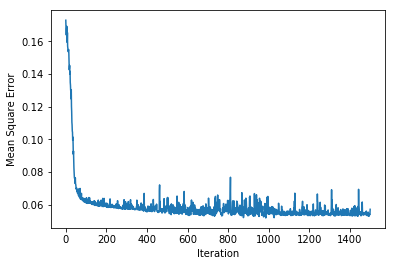

In [5]:
a_a_net=mlp_trainer(X_train_reflexiv_A_A,y_train_reflexiv_A_A,train_length=1500)

## Trainning Evaluation

In [6]:
([[a_a_net.activate(X_test_reflexiv_A_A[i]),y_test_reflexiv_A_A[i]] for i in xrange(len(X_test_reflexiv_A_A))])

[[array([  8.79512776e-01,   1.02065814e-10,   3.60406175e-02]), [0, 0, 0]],
 [array([  1.39863428e-11,   9.98027960e-01,   6.59181453e-02]), [0, 1, 0]],
 [array([  4.52724972e-01,   1.11198585e-09,   3.83079476e-02]), [0, 0, 0]],
 [array([  9.04321629e-01,   1.45567048e-12,   7.75604240e-02]), [1, 0, 0]],
 [array([  9.03648937e-05,   3.34754764e-05,   4.64735533e-02]), [0, 0, 1]],
 [array([  6.76147535e-01,   4.17033901e-10,   3.70785046e-02]), [0, 0, 0]],
 [array([  2.22260110e-09,   8.35465808e-01,   5.88469960e-02]), [0, 0, 0]],
 [array([  4.85329031e-07,   1.17774532e-02,   5.22207185e-02]), [0, 0, 1]],
 [array([  1.29965663e-04,   6.30884742e-08,   1.81473966e-01]), [0, 0, 0]],
 [array([  9.99940667e-01,   6.02120076e-13,   7.64573710e-02]), [1, 0, 0]],
 [array([  2.72656319e-13,   9.73462334e-01,   5.71594146e-02]), [0, 1, 0]],
 [array([  8.06915917e-10,   9.35878278e-01,   6.11442379e-02]), [0, 1, 0]],
 [array([  1.96398462e-07,   1.94228372e-02,   5.88286712e-02]), [0, 0, 0]],

# Symmetry
## Trainning (A-B)

In [7]:
symmetry_A_B=tr_dat.symmetry_A_B

In [8]:
X_symmetry_A_B=[dat[0] for dat in symmetry_A_B]
y_symmetry_A_B=[dat[1] for dat in symmetry_A_B]

X_train_symmetry_A_B, X_test_symmetry_A_B, y_train_symmetry_A_B, y_test_symmetry_A_B = train_test_split(X_symmetry_A_B,y_symmetry_A_B, test_size=0.2)

**** Respuestas de entrenamiento
                                                    0          1
0   [0.987880300896, 2.49738667903e-05, 0.00479888...  [1, 0, 0]
1   [0.986955078903, 2.42301610746e-05, 0.00533746...  [1, 0, 0]
2   [0.00800949372036, 0.0115262395275, 0.98561821...  [0, 0, 1]
3   [0.00920622907095, 0.0083671115182, 0.00588913...  [0, 0, 0]
4   [0.0110796649299, 0.0106126064581, 0.984699198...  [0, 0, 1]
5   [1.53032366985e-05, 0.990696993499, 0.00392205...  [0, 1, 0]
6   [0.0094261544892, 0.00951787842569, 0.00509672...  [0, 0, 0]
7   [0.0103192450345, 0.0109704606593, 0.005458947...  [0, 0, 0]
8   [0.986866217348, 2.58091575389e-05, 0.00494592...  [1, 0, 0]
9   [1.64976053077e-05, 0.988610124307, 0.00390252...  [0, 1, 0]
10  [0.00933719348995, 0.0112890276074, 0.00638008...  [0, 0, 0]
11  [1.60457282664e-05, 0.988890181365, 0.00420845...  [0, 1, 0]
12  [0.985595507177, 2.50172561572e-05, 0.00554731...  [1, 0, 0]
13  [0.00962253891813, 0.0116326704019, 0.98542075...  [0

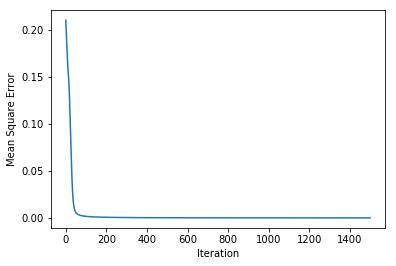

In [9]:
a_b_net=mlp_trainer(X_train_symmetry_A_B,y_train_symmetry_A_B,train_length=1500)

## Trainning Evaluation

In [10]:
([[a_b_net.activate(X_test_symmetry_A_B[i]),y_test_symmetry_A_B[i]] for i in xrange(len(X_test_symmetry_A_B))])

[[array([  2.49531468e-05,   9.45145368e-01,   1.74970996e-02]), [0, 1, 0]],
 [array([  9.85622248e-01,   2.48821173e-05,   6.52086096e-03]), [1, 0, 0]],
 [array([ 0.00800184,  0.01256778,  0.98360742]), [0, 0, 1]],
 [array([  9.84432030e-01,   2.62569377e-05,   5.26651679e-03]), [1, 0, 0]],
 [array([ 0.01386434,  0.01443292,  0.9815604 ]), [0, 0, 1]]]

## Relational Response Symmetry Evaluation (B-A)


In [11]:
symmetry_B_A=tr_dat.symmetry_B_A

In [12]:
X_symmetry_B_A=[dat[0] for dat in symmetry_B_A]
y_symmetry_B_A=[dat[1] for dat in symmetry_B_A]

In [13]:
([[a_b_net.activate(X_symmetry_B_A[i]),y_symmetry_B_A[i]] for i in xrange(len(X_symmetry_B_A))])

[[array([ 0.07589395,  0.00290598,  0.00591387]), [1, 0, 0]],
 [array([ 0.08493619,  0.04935951,  0.00083386]), [1, 0, 0]],
 [array([ 0.04408018,  0.0120672 ,  0.00809116]), [1, 0, 0]],
 [array([ 0.0980643 ,  0.00510569,  0.00357931]), [1, 0, 0]],
 [array([ 0.03847909,  0.07480018,  0.00105519]), [1, 0, 0]],
 [array([ 0.06797406,  0.00236631,  0.00506752]), [1, 0, 0]],
 [array([ 0.0061395 ,  0.00524467,  0.02577416]), [0, 1, 0]],
 [array([ 0.0040227 ,  0.021644  ,  0.00674914]), [0, 1, 0]],
 [array([ 0.005389  ,  0.01766098,  0.00696624]), [0, 1, 0]],
 [array([ 0.00409689,  0.02028475,  0.00580062]), [0, 1, 0]],
 [array([ 0.0015797 ,  0.29816037,  0.00193466]), [0, 1, 0]],
 [array([ 0.0048443 ,  0.01201091,  0.00917788]), [0, 1, 0]],
 [array([ 0.00120187,  0.00959619,  0.64367874]), [0, 0, 1]],
 [array([ 0.00083446,  0.01773791,  0.49802627]), [0, 0, 1]],
 [array([ 0.00119997,  0.01343715,  0.43821158]), [0, 0, 1]],
 [array([ 0.0008986 ,  0.01699405,  0.43565654]), [0, 0, 1]],
 [array(